In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt


In [6]:
path='C:/Users/kelvin/Desktop/sales'
files=[file for file in os.listdir(path)]
all_data=pd.DataFrame()
for file in files:
    if "xlsx" in file:
        df=pd.read_excel(file)
        all_data=pd.concat([df,all_data])
        all_data.to_excel("4months sales.xlsx",index=False)

In [7]:
#reading from the new dataframe
data=pd.read_excel("4months sales.xlsx")
data.head()

,Product,Order Date,Purchase Address,price,order_id,quantity_ordered,order_date,month
0,Bose SoundSport Headphones,08/01/19 01:56,"882 Lake St, San Francisco, CA 94016",99.99,223710,1,08/01/19 01:56,8
1,27in 4K Gaming Monitor,08/01/19 01:15,"480 Spruce St, Los Angeles, CA 90001",389.99,225541,1,08/01/19 01:15,8
2,USB-C Charging Cable,08/01/19 01:14,"592 Forest St, Los Angeles, CA 90001",11.95,225658,1,08/01/19 01:14,8
3,USB-C Charging Cable,08/01/19 00:20,"501 Jefferson St, San Francisco, CA 94016",11.95,227115,1,08/01/19 00:20,8
4,AAA Batteries (4-pack),08/01/19 00:11,"57 8th St, New York City, NY 10001",2.99,227521,2,08/01/19 00:11,8


In [8]:
#droping "Order date", "order_date"  and  "order_id" columns
data=data.drop(["Order Date","order_id","order_date"],axis=1)
data.to_excel("4months sales.xlsx",index=False)

In [10]:
#reading from the new datafrome after droping several columns
data.head(3)

,Product,Purchase Address,price,quantity_ordered,month
0,Bose SoundSport Headphones,"882 Lake St, San Francisco, CA 94016",99.99,1,8
1,27in 4K Gaming Monitor,"480 Spruce St, Los Angeles, CA 90001",389.99,1,8
2,USB-C Charging Cable,"592 Forest St, Los Angeles, CA 90001",11.95,1,8


In [14]:
#creating "city" and "street" columns from "Purchase Address" column
data['city']=data['Purchase Address'].astype(str).apply(lambda x:x.split(",")[1])
data['street']=(data['Purchase Address'].astype(str).apply(lambda x:x.split(",")[0])).str.strip("St")
data.to_excel("4months sales.xlsx",index=False)

In [15]:
data.head()

,Product,Purchase Address,price,quantity_ordered,month,city,street
0,Bose SoundSport Headphones,"882 Lake St, San Francisco, CA 94016",99.99,1,8,San Francisco,882 Lake
1,27in 4K Gaming Monitor,"480 Spruce St, Los Angeles, CA 90001",389.99,1,8,Los Angeles,480 Spruce
2,USB-C Charging Cable,"592 Forest St, Los Angeles, CA 90001",11.95,1,8,Los Angeles,592 Forest
3,USB-C Charging Cable,"501 Jefferson St, San Francisco, CA 94016",11.95,1,8,San Francisco,501 Jefferson
4,AAA Batteries (4-pack),"57 8th St, New York City, NY 10001",2.99,2,8,New York City,57 8th


In [23]:
#creating the total column by multiplying "quantity_ordered" and "price" columns
data['Total']=data['quantity_ordered']*data['price'].round()
data.to_excel("4months sales.xlsx",index=False)

In [27]:
data.head(3)

,Product,Purchase Address,price,quantity_ordered,month,city,street,Total
0,Bose SoundSport Headphones,"882 Lake St, San Francisco, CA 94016",99.99,1,8,San Francisco,882 Lake,100.0
1,27in 4K Gaming Monitor,"480 Spruce St, Los Angeles, CA 90001",389.99,1,8,Los Angeles,480 Spruce,390.0
2,USB-C Charging Cable,"592 Forest St, Los Angeles, CA 90001",11.95,1,8,Los Angeles,592 Forest,12.0


In [38]:
#calculating each city total sales for the month of August
cities=data['city'].unique()
#looping through the  list of cities
city_sales_list=[]
for city in cities:
    if " " in city:
        city_name=city.replace(" ","_")
        city_total_sales=f"{city_name}_total_sales".strip("_")
        city_total_sales=0
        for i in range(len(data)):
            if(data.loc[i].city==city and data.loc[i].month==8):
                city_total_sales+=data.loc[i].Total
        #printing out each month total sales for the month of august
        new_city_name=city_name.strip("_")
        print(f"{new_city_name}: {city_total_sales}")
        city_sales_list.append(city_total_sales)
        

San_Francisco: 538895.0
Los_Angeles: 345971.0
New_York_City: 303250.0
Boston: 239325.0
Portland: 152916.0
Seattle: 189760.0
Dallas: 179802.0
Atlanta: 169306.0
Austin: 125741.0


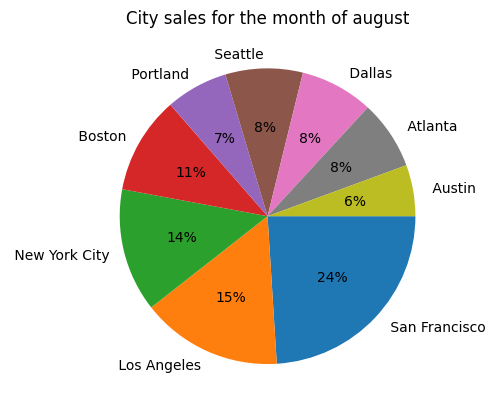

In [39]:
#ploting a piechart of city total sales for the month august
sizes=city_sales_list
labels=cities
plt.title("City sales for the month of august")
plt.pie(sizes,labels=labels,autopct="%1.f%%",counterclock=False)
plt.show()